In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dati = pd.read_csv('bitcoin_data.csv')
dati['Timestamp'] = pd.to_datetime(dati['Timestamp'])

# Calcola la derivata del prezzo
dati['Price_Diff'] = dati['Price'].diff()

# Rimuove la prima riga perché non ha un valore precedente per calcolare la differenza
dati = dati.dropna()

dati = dati.reset_index(drop=True)

In [9]:
dati

,Timestamp,Price,Price_Diff
0,2013-04-29,141.960000,6.660000
1,2013-04-30,135.300000,-6.660000
2,2013-05-01,117.000000,-18.300000
3,2013-05-02,103.430000,-13.570000
4,2013-05-03,91.010000,-12.420000
...,...,...,...
3874,2023-12-09,44202.176109,932.056550
3875,2023-12-10,43745.491992,-456.684118
3876,2023-12-11,43757.959938,12.467946
3877,2023-12-12,41200.962726,-2556.997212


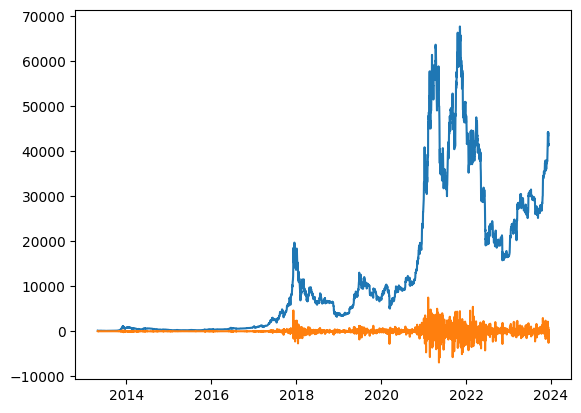

In [10]:
plt.plot(dati['Timestamp'], dati['Price'])
plt.plot(dati['Timestamp'], dati['Price_Diff'])

In [11]:
data_inizio = '2020-01-01'
indice_inizio = dati[dati['Timestamp'] == data_inizio].index[0]

In [12]:
data_fine = '2023-12-13'
indice_fine = dati[dati['Timestamp'] == data_fine].index[0]

In [13]:
dati_temp = dati[indice_inizio:indice_fine + 1]

In [14]:
soglia_accettabile = 100

# Trova il periodo più lungo in cui il valore medio della derivata del prezzo è 0 o comunque sotto la soglia_accettabile
periodi = []
inizio_periodo = None
somma = 0

for i in range(len(dati_temp)):
    for k in range(i, len(dati_temp)):
        somma += dati_temp['Price_Diff'].iloc[k]
        if abs(somma) <= soglia_accettabile and i != k:
            periodi.append((dati_temp['Timestamp'].iloc[i], dati_temp['Timestamp'].iloc[k]))
    somma = 0

# Trova il periodo più lungo
periodo_piu_lungo = max(periodi, key=lambda x: (x[1] - x[0]).days)

print(f"Il periodo più lungo in cui il valore medio della derivata del prezzo è 0 va dalla data {periodo_piu_lungo[0]} alla data {periodo_piu_lungo[1]}")

# Cerco gli indici corrispondenti al periodo massimo trovato e restituisco la somma dei corrispondenti Price_Diff per verificare che sia effettivamente sotto la soglia
indice1 =  dati_temp[dati_temp['Timestamp'] == periodo_piu_lungo[0]].index[0]
indice2 = dati_temp[dati_temp['Timestamp'] == periodo_piu_lungo[1]].index[0]
print('La somma corrispondente al periodo più lungo trovato è:', sum(dati_temp['Price_Diff'].iloc[indice1: indice2 + 1]))

Il periodo più lungo in cui il valore medio della derivata del prezzo è 0 va dalla data 2021-01-09 00:00:00 alla data 2023-12-03 00:00:00
La somma corrispondente al periodo più lungo trovato è: 0


In [15]:
# Cerco gli indici corrispondenti al periodo massimo trovato e restituisco la somma dei corrispondenti Price_Diff per verificare che sia effettivamente sotto la soglia
indice1 =  dati_temp[dati_temp['Timestamp'] == periodo_piu_lungo[0]].index[0]
indice2 = dati_temp[dati_temp['Timestamp'] == periodo_piu_lungo[1]].index[0]
sum(dati_temp['Price_Diff'].iloc[indice1: indice2 + 1])

0

In [16]:
# Controllo per sicurezza che non ci siano altri periodi con la stesssa lunghezza massima
check = True
lunghezza_max = (periodo_piu_lungo[1] - periodo_piu_lungo[0]).days
for coppia in periodi:
    if (coppia[1] - coppia[0]).days == lunghezza_max and not (coppia[0] == periodo_piu_lungo[0] and coppia[1] == periodo_piu_lungo[1]):
        print('È stato trovato un altro periodo con la stessa lunghezza! Va dalla data', coppia[0], 'alla data', coppia[1])
        check = False
if check:
    print('Non sono stati trovati altri periodi altrettanto lunghi')

Non sono stati trovati altri periodi altrettanto lunghi


### Codice generalizzato

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Alessandro\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Alessandro\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\Alessandro\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\Alessandro\AppData\Roaming\Python\Python310\site-packages\traitle

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Alessandro\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Alessandro\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\Alessandro\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\Alessandro\AppData\Roaming\Python\Python310\site-packages\traitle

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.1 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Alessandro\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Alessandro\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\Alessandro\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\Alessandro\AppData\Roaming\Python\Python310\site-packages\traitle

AttributeError: _ARRAY_API not found

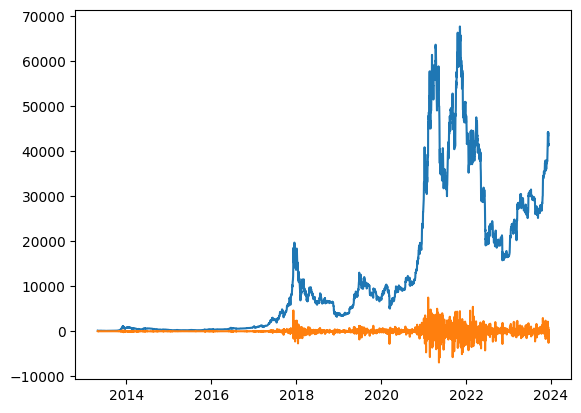

In [2]:
# Lettura dei dati
dati = pd.read_csv('bitcoin_data.csv')
dati['Timestamp'] = pd.to_datetime(dati['Timestamp'])

# Calcola la derivata del prezzo
dati['Price_Diff'] = dati['Price'].diff()

# Rimuove la prima riga perché non ha un valore precedente per calcolare la differenza
dati = dati.dropna().reset_index(drop=True)

# Visualizzazione grafica (facoltativa)
plt.plot(dati['Timestamp'], dati['Price'])
plt.plot(dati['Timestamp'], dati['Price_Diff'])

In [11]:
# Selezione dell'intervallo temporale di interesse
data_inizio = '2020-01-01'
indice_inizio = dati[dati['Timestamp'] == data_inizio].index[0]
data_fine = '2023-12-13'
indice_fine = dati[dati['Timestamp'] == data_fine].index[0]

dati_temp = dati[indice_inizio:indice_fine + 1]

# Parametri configurabili
percentuale_salita = 0.1  # Percentuale desiderata di salite
soglia_accettabile = 0.1  # Errore accettabile sul rapporto positivo/negativo

Il periodo più lungo in cui la percentuale di salite è circa 0.1 con errore ±0.1 va dalla data 2020-02-14 00:00:00 alla data 2020-03-13 00:00:00
La somma corrispondente al periodo più lungo trovato è: -4786.078023463261
La percentuale di salite in particolare è: 23.20%


C:\Users\Alessandro\AppData\Local\Temp\ipykernel_271228\3482281308.py:40: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  somma_salite_totale = sum(dati_temp.loc[indice1: indice2 + 1][dati_temp['Price_Diff'] > 0]['Price_Diff'])
C:\Users\Alessandro\AppData\Local\Temp\ipykernel_271228\3482281308.py:41: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  somma_discese_totale = abs(sum(dati_temp.loc[indice1: indice2 + 1][dati_temp['Price_Diff'] < 0]['Price_Diff']))


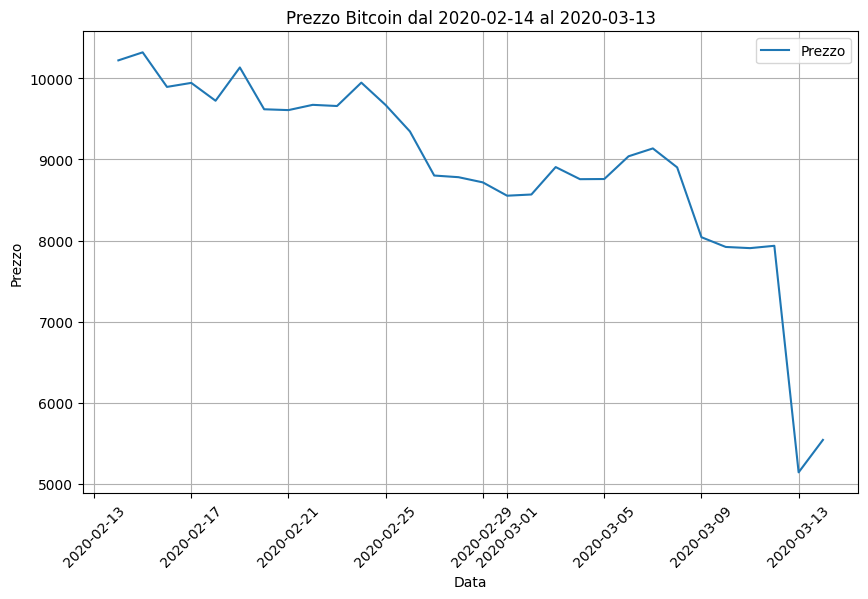

In [12]:
# Trova il periodo più lungo che soddisfa la condizione sulla percentuale di salite
periodi = []
inizio_periodo = None
somma_salite = 0
somma_discese = 0

for i in range(len(dati_temp)):
    for k in range(i, len(dati_temp)):
        if dati_temp['Price_Diff'].iloc[k] > 0:
            somma_salite += dati_temp['Price_Diff'].iloc[k]
        elif dati_temp['Price_Diff'].iloc[k] < 0:
            somma_discese += abs(dati_temp['Price_Diff'].iloc[k])

        # Calcola il rapporto tra salite e salite+discese
        if somma_salite + somma_discese > 0:
            percentuale_attuale = somma_salite / (somma_salite + somma_discese)
        else:
            percentuale_attuale = 0

        # Verifica se la percentuale attuale rientra nella soglia accettabile
        if abs(percentuale_attuale - percentuale_salita) <= soglia_accettabile and i != k:
            periodi.append((dati_temp['Timestamp'].iloc[i], dati_temp['Timestamp'].iloc[k]))
    
    # Resetta le somme per il prossimo intervallo
    somma_salite = 0
    somma_discese = 0

# Trova il periodo più lungo
if periodi:
    periodo_piu_lungo = max(periodi, key=lambda x: (x[1] - x[0]).days)

    print(f"Il periodo più lungo in cui la percentuale di salite è circa {percentuale_salita} con errore ±{soglia_accettabile} va dalla data {periodo_piu_lungo[0]} alla data {periodo_piu_lungo[1]}")

    # Verifica la somma dei Price_Diff per il periodo trovato
    indice1 = dati_temp[dati_temp['Timestamp'] == periodo_piu_lungo[0]].index[0]
    indice2 = dati_temp[dati_temp['Timestamp'] == periodo_piu_lungo[1]].index[0]
    somma_finale = sum(dati_temp['Price_Diff'].loc[indice1: indice2 + 1])
    print('La somma corrispondente al periodo più lungo trovato è:', somma_finale)

    somma_salite_totale = sum(dati_temp.loc[indice1: indice2 + 1][dati_temp['Price_Diff'] > 0]['Price_Diff'])
    somma_discese_totale = abs(sum(dati_temp.loc[indice1: indice2 + 1][dati_temp['Price_Diff'] < 0]['Price_Diff']))

    # Calcola la percentuale corretta di salite
    percentuale_salita_finale = somma_salite_totale / (somma_salite_totale + somma_discese_totale)
    print(f'La percentuale di salite in particolare è: {percentuale_salita_finale * 100:.2f}%')

    # Crea il grafico del prezzo solo per il periodo selezionato
    plt.figure(figsize=(10, 6))
    plt.plot(dati_temp['Timestamp'].loc[indice1:indice2 + 1], dati_temp['Price'].loc[indice1:indice2 + 1], label='Prezzo')
    
    # Titolo e etichette
    plt.title(f"Prezzo Bitcoin dal {periodo_piu_lungo[0].date()} al {periodo_piu_lungo[1].date()}")
    plt.xlabel('Data')
    plt.ylabel('Prezzo')
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    
    # Mostra il grafico
    plt.show()
else:
    print('Non è stato trovato nessun periodo che soddisfi le condizioni.')

In [13]:
periodo_piu_lungo

(Timestamp('2020-02-14 00:00:00'), Timestamp('2020-03-13 00:00:00'))

In [14]:
# Controllo per sicurezza che non ci siano altri periodi con la stesssa lunghezza massima
check = True
lunghezza_max = (periodo_piu_lungo[1] - periodo_piu_lungo[0]).days
for coppia in periodi:
    if (coppia[1] - coppia[0]).days == lunghezza_max and not (coppia[0] == periodo_piu_lungo[0] and coppia[1] == periodo_piu_lungo[1]):
        print('È stato trovato un altro periodo con la stessa lunghezza! Va dalla data', coppia[0], 'alla data', coppia[1])
        check = False
if check:
    print('Non sono stati trovati altri periodi altrettanto lunghi')

Non sono stati trovati altri periodi altrettanto lunghi
